<a href="https://colab.research.google.com/github/NanjalaBarbra/Medical-Insurance-cost-prediction-with-python/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data collection and processing

In [27]:
#loading the insurance data into pandas dataframe
insurance_data = pd.read_csv('/content/insurance.csv')

In [28]:
#printing the first five rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [30]:
#getting some info about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features

-sex
-smoker
-Region

In [31]:
#checking for missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data analysis


In [32]:
#statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-2891692379.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


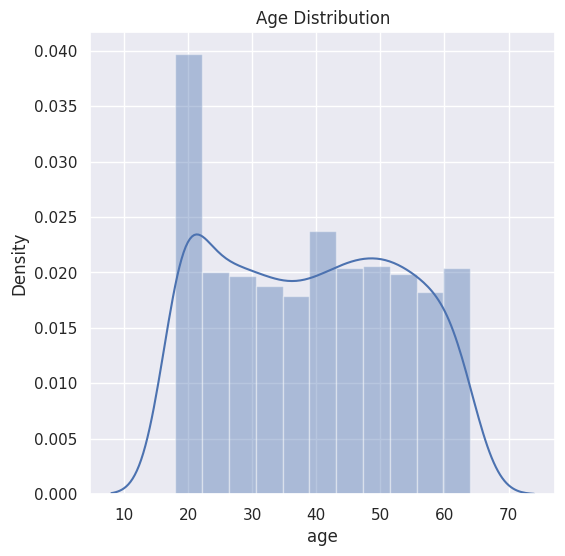

In [33]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()


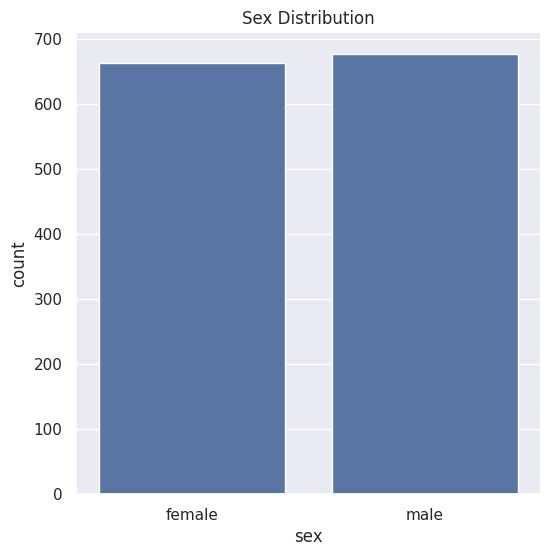

In [34]:


#gender column
plt.figure(figsize=(6,6))
sns.countplot(x ='sex',data = insurance_data)
plt.title('Sex Distribution')
plt.show()

In [35]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-2733040758.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


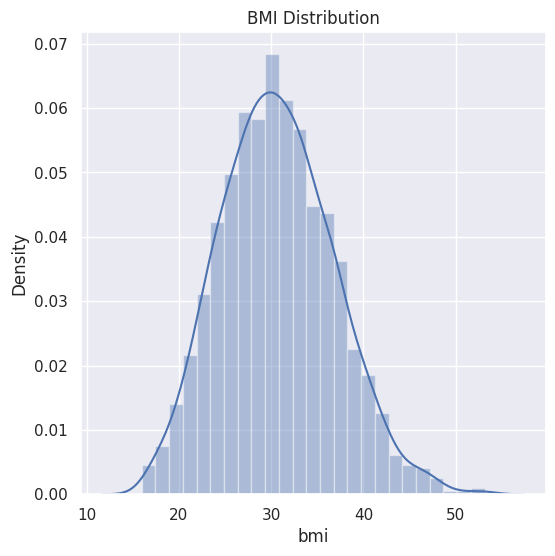

In [37]:
#BMI distribution in the dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

normal BMI range ---> 18.5 to 24.9

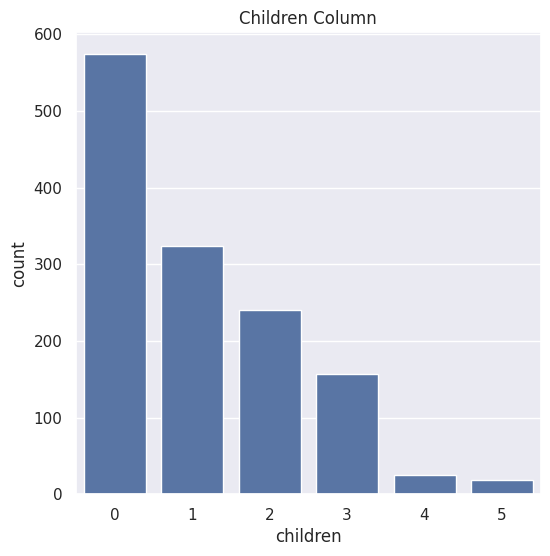

In [38]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children Column')
plt.show()


In [39]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


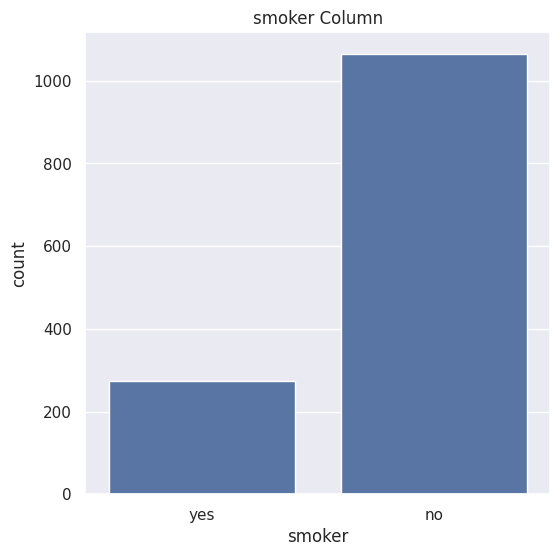

In [40]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('smoker Column')
plt.show()

In [41]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


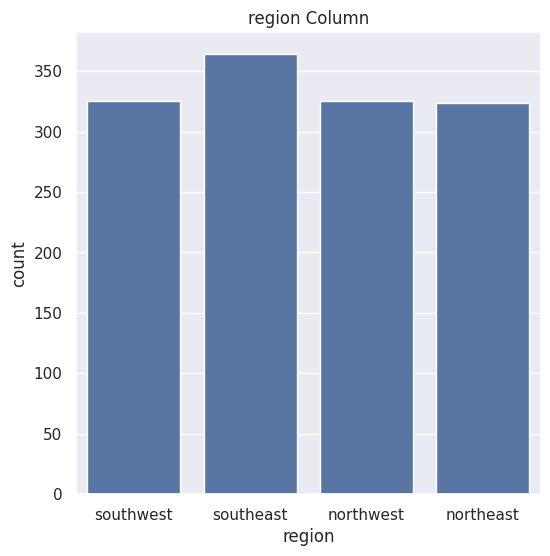

In [42]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('region Column')
plt.show()

In [43]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-1393789710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


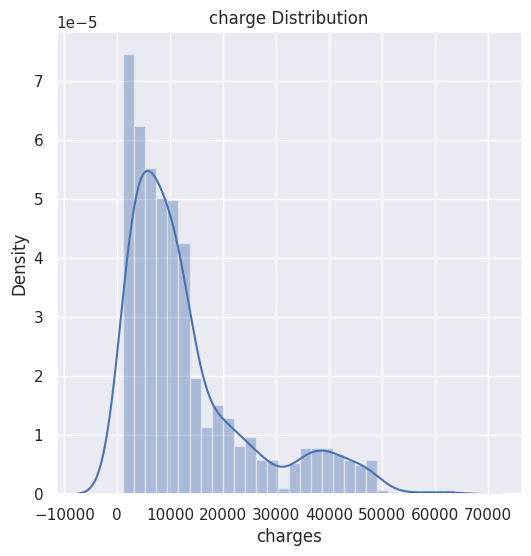

In [44]:
#distribution of charges

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('charge Distribution')
plt.show()

Data preprocessing

Incoding the categorical features

In [49]:
#encoding sex column
insurance_data.replace ({'sex': {'male':0 ,'female':1}},inplace=True)

#encoding smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [50]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and target

In [51]:
X = insurance_data.drop(columns='charges',axis=1)
Y =insurance_data['charges']


In [52]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [53]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the data into raining and test data

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training


Linear Regression

In [63]:
#loading the linear regression model
regressor = LinearRegression()

In [64]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [65]:
#predicting on training data
training_data_prediction = regressor.predict(X_train)

In [66]:
#R squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [69]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)


In [71]:
#R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684076


Building a predictive system

In [73]:
input_data = (31,1,25.74,0,1,0)

#changing input data into a nmpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print ('The insurance cost is USD', prediction[0])

[3760.0805765]
The issurance cost is USD 3760.080576496057


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
